<a href="https://colab.research.google.com/github/m4st3rch13f/09642025_Churning_Customers/blob/main/Assignment_3_Churning_Customers_in_a_Telecoms_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

Loading Dataset

In [3]:
df=pd.read_csv('/content/drive/My Drive/Intro to AI/CustomerChurn_dataset.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping unnecessary columns

In [6]:
df.drop(['customerID'], axis=1, inplace=True)

In [7]:
#Changing TotalCharges from numeric string to actual numeric data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#Creating a data frame to store the SeniorCitizen variable because it is actually categorical
senior_cit = df['SeniorCitizen']
senior_cit

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [9]:
#Taking just the numeric columns
num_df=pd.DataFrame(df.select_dtypes(exclude=['object']))
num_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [10]:
num_df.drop(['SeniorCitizen'], axis=1, inplace=True)

In [11]:
#Taking just the categorical variables
cat_df=pd.DataFrame(df.select_dtypes(include=['object']))
cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Imputing Numerical Variables

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')

num_df=pd.DataFrame(imputer.fit_transform(num_df),columns=num_df.columns)

Scaling the Numerical Variables

In [13]:
num_df

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


In [14]:
#num_df=pd.DataFrame(sc.transform(num_df),columns=num_df.columns)

Encoding Categorical Variables

In [15]:
cat_df=pd.concat([cat_df, senior_cit],axis=1)
cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,0
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,0
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_df.columns:
  cat_df[i]=le.fit_transform(cat_df[i])

#cat_df=pd.get_dummies(cat_df)

In [17]:
cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA)

In [18]:
target_var = 'Churn'

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-20-231103d22d53>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_var, data=df, ci=None)


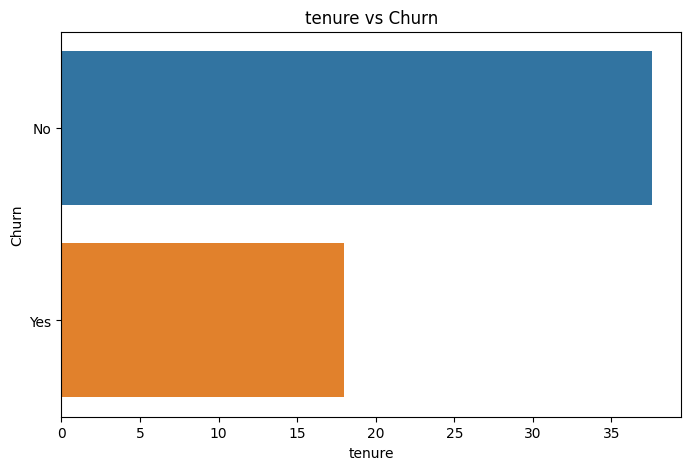

<ipython-input-20-231103d22d53>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_var, data=df, ci=None)


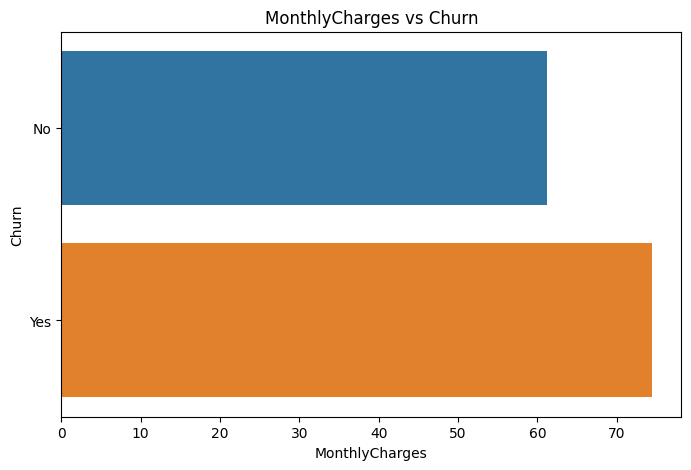

<ipython-input-20-231103d22d53>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y=target_var, data=df, ci=None)


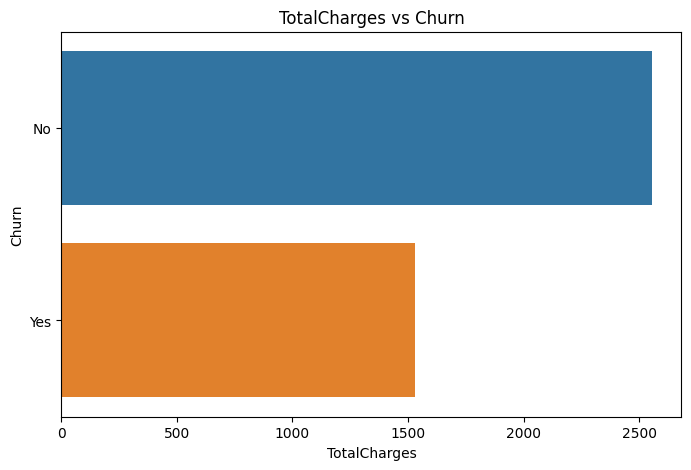

In [20]:
#Plotting numeric variables against churn to see the relationship between them and churn
for column in num_df.columns:
    if column != target_var:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=column, y=target_var, data=df, ci=None)
        plt.title(f'{column} vs {target_var}')
        plt.show()

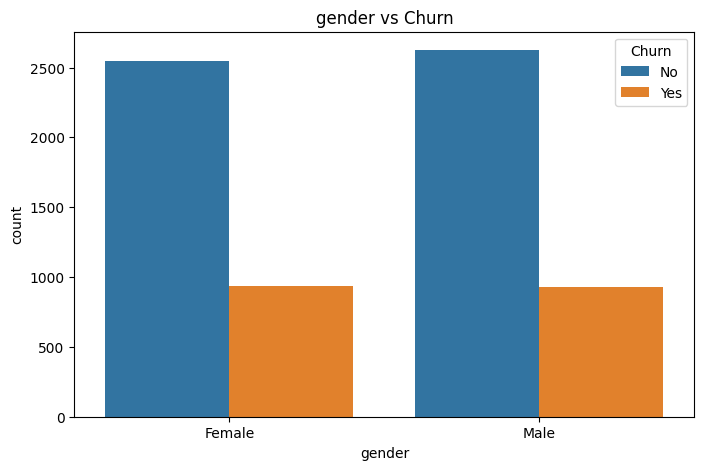

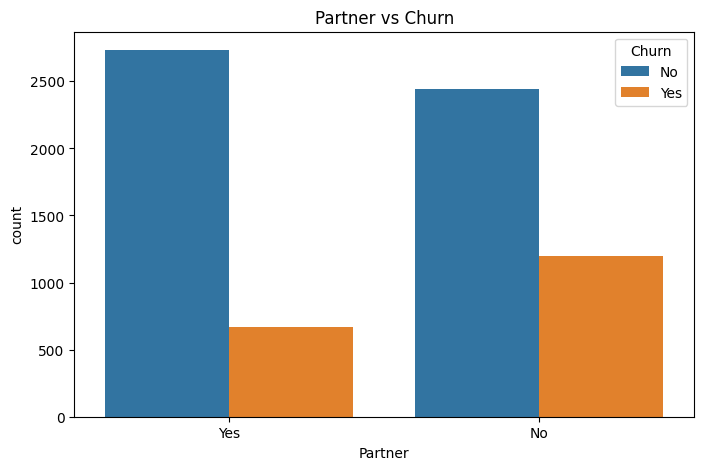

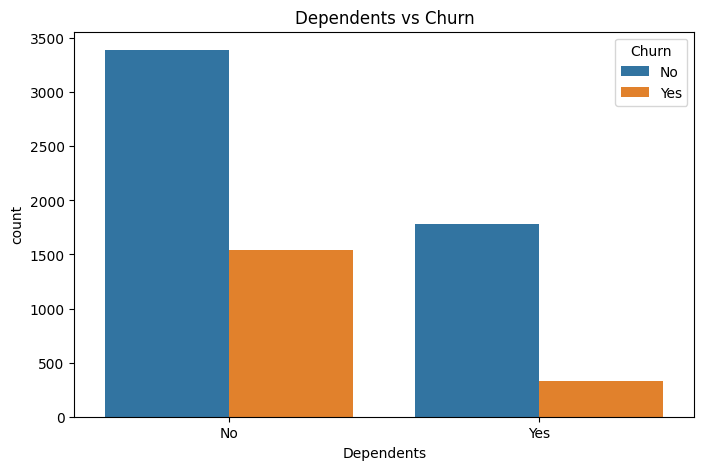

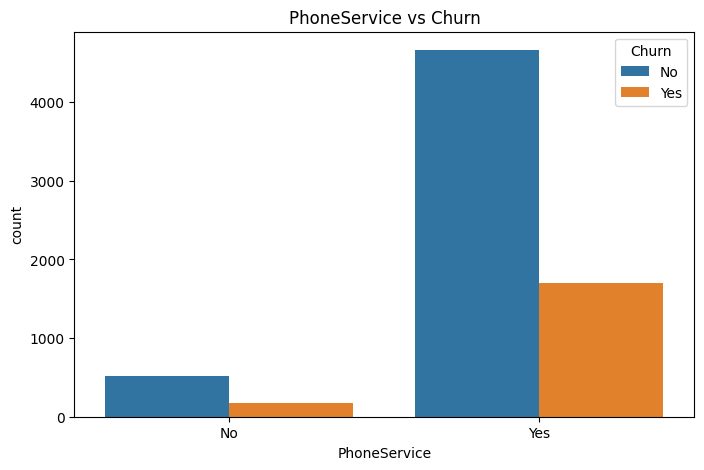

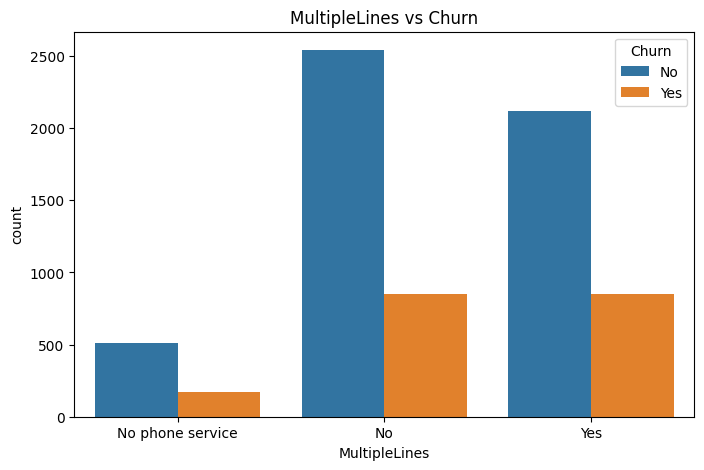

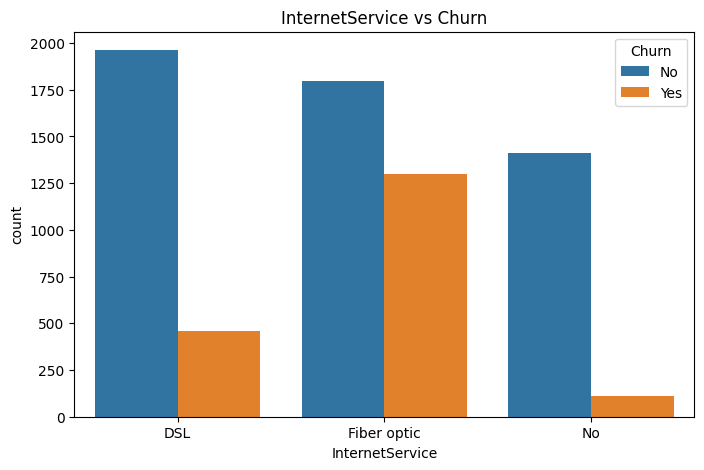

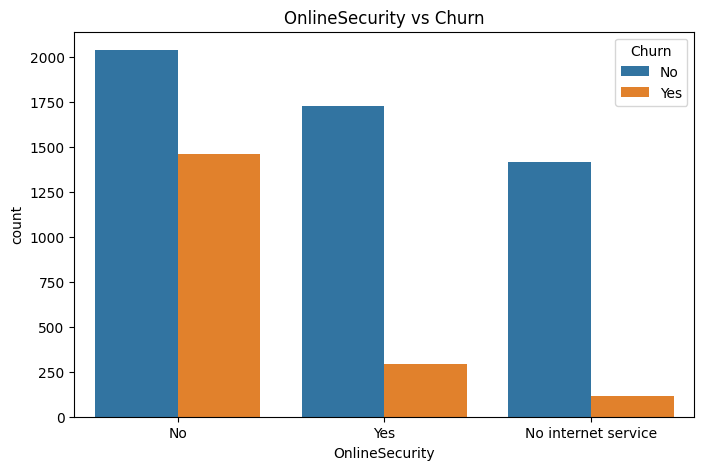

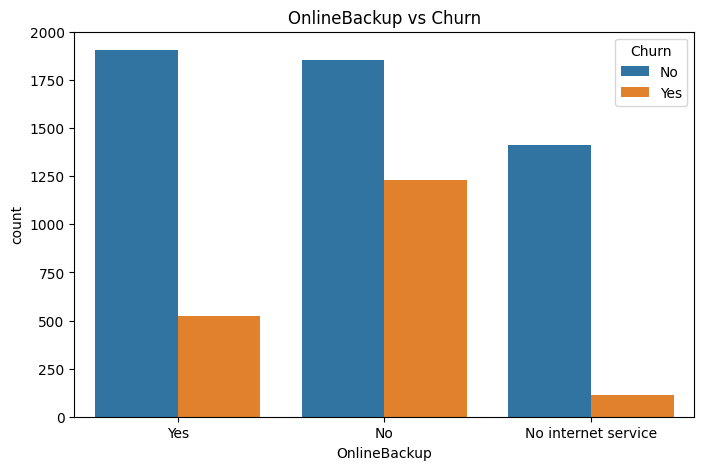

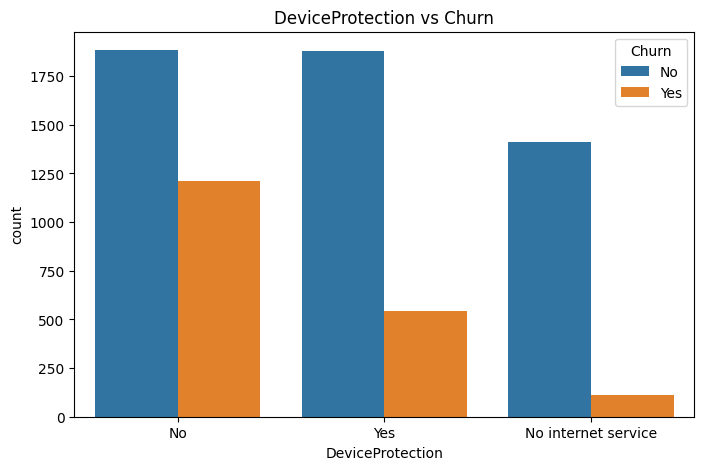

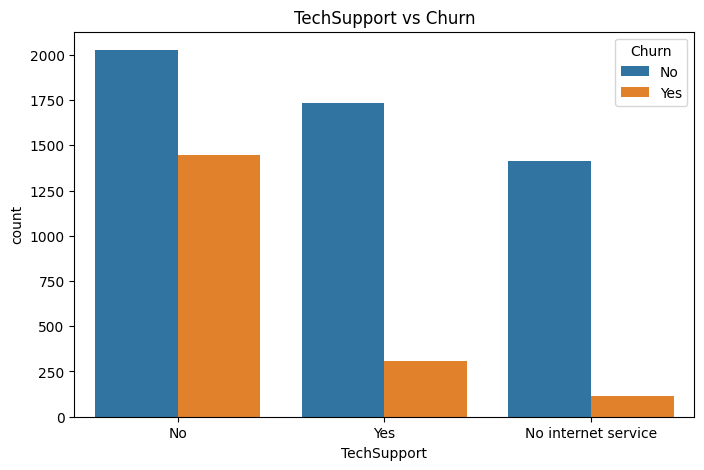

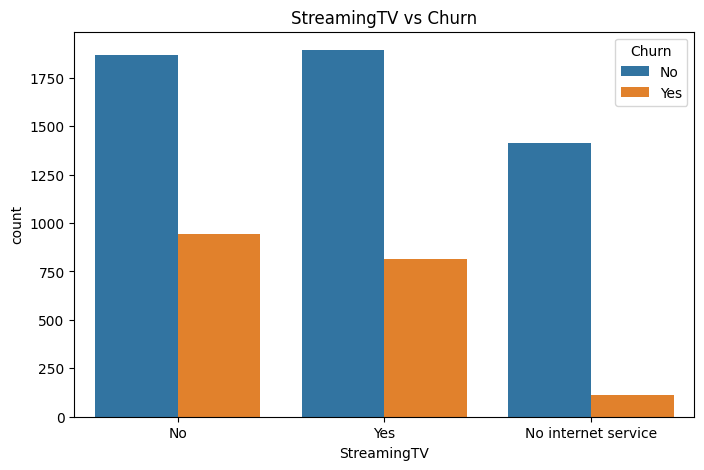

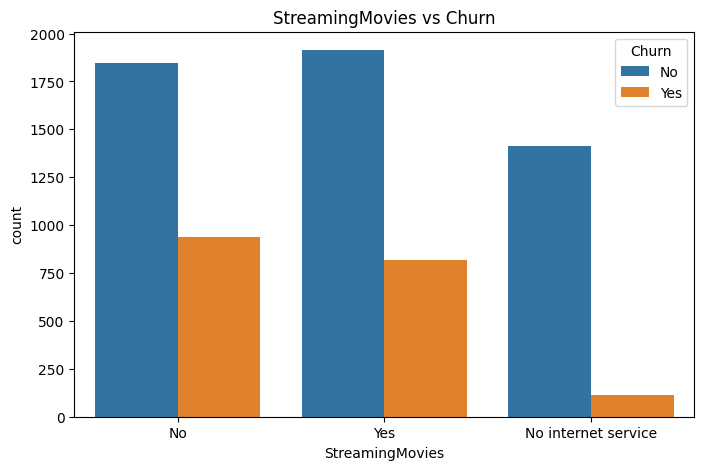

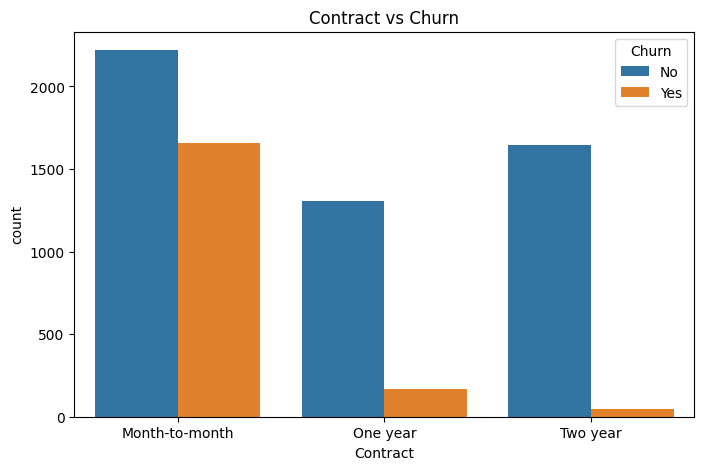

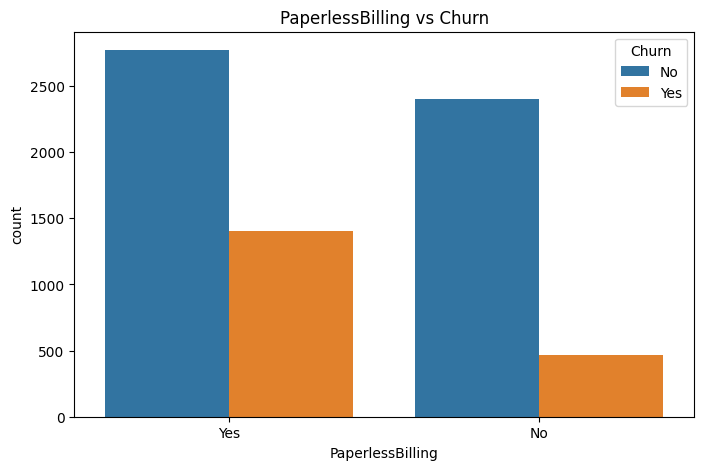

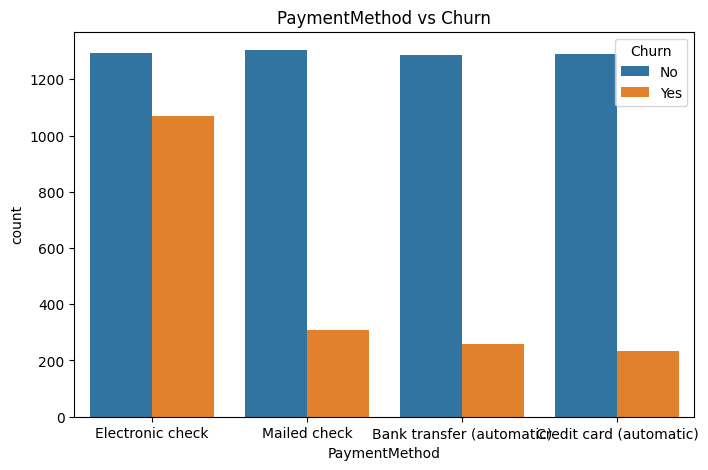

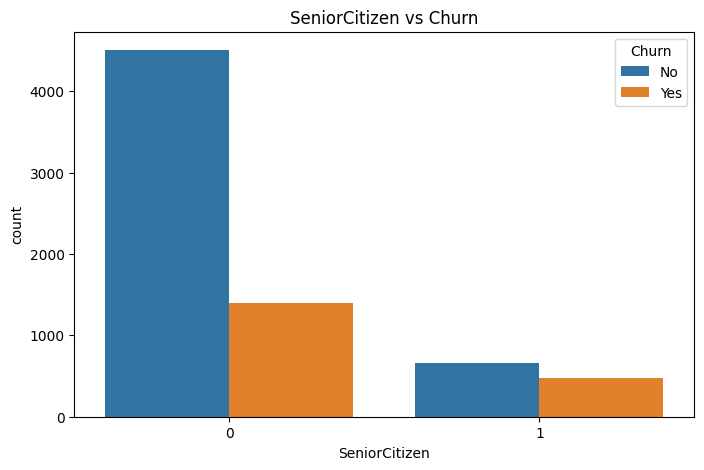

In [21]:
#Plotting categorical variables against churn to see the relationship between them and churn
for column in cat_df.columns:
    if column != target_var:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=column, hue=target_var, data=df)
        plt.title(f'{column} vs {target_var}')
        plt.show()

In [22]:
#Putting the numerical and categorical data together after processing the data
df=pd.concat([num_df,cat_df],axis=1)
df

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1.0,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34.0,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2.0,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45.0,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2.0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0
7039,72.0,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0
7040,11.0,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0
7041,4.0,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1


# Training an MLP Model

Selecting Relevant Features

In [23]:
#Importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1)
y = df[['Churn']]

In [24]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=3, scoring='accuracy')
rfecv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

RFECV(cv=3, estimator=RandomForestClassifier(random_state=42),
      scoring='accuracy')

In [26]:
top10_feature_indices = rfecv.ranking_.argsort()[:10]

In [27]:
selected_features = X_train.columns[top10_feature_indices]
selected_features

Index(['tenure', 'PaperlessBilling', 'Contract', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup',
       'PaymentMethod', 'OnlineSecurity'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X = X[selected_features]
X

,tenure,PaperlessBilling,Contract,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup,PaymentMethod,OnlineSecurity
0,1.0,1,0,0,0,0,0,2,2,0
1,34.0,0,1,0,0,0,2,0,3,2
2,2.0,1,0,0,0,0,0,2,3,2
3,45.0,0,1,0,0,2,2,0,0,2
4,2.0,1,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
7038,24.0,1,1,2,2,2,2,0,3,2
7039,72.0,1,1,2,2,0,2,2,1,0
7040,11.0,1,0,0,0,0,0,0,2,2
7041,4.0,1,0,0,0,0,0,0,3,0


In [29]:
scaled = sc.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

In [30]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Training the model using the Keras Functional API
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(32, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(12, activation='relu')(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)

mlp_model = Model(inputs=input_layer, outputs=output_layer)

In [33]:
mlp_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
177/177 [==============================] - 2s 5ms/step - loss: 0.5923 - accuracy: 0.7139 - val_loss: 0.5009 - val_accuracy: 0.7353
Epoch 2/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.7599 - val_loss: 0.4569 - val_accuracy: 0.7871
Epoch 3/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4589 - accuracy: 0.7813 - val_loss: 0.4470 - val_accuracy: 0.7892
Epoch 4/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.7902 - val_loss: 0.4417 - val_accuracy: 0.7878
Epoch 5/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.7890 - val_loss: 0.4377 - val_accuracy: 0.7899
Epoch 6/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4435 - accuracy: 0.7874 - val_loss: 0.4345 - val_accuracy: 0.7885
Epoch 7/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7929 - val_loss: 0.4327 - val_accuracy: 0.7949
Epoch 

In [34]:
#Calculating the accuracy of the model

_, accuracy = mlp_model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8062


80.61767816543579

In [35]:
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7878
Test Loss: 0.4216
Test Accuracy: 78.7793


# Cross Validation with Grid Search

Using Cross Validation with Grid Search to Find Optimal Model Parameters

In [36]:
!pip install scikeras

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier, KerasRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [38]:
X_Corr=X.copy()

In [39]:
def create_model(batch_size, dropout_rate, weight_constraint,activation):
  input_shape = (X_Corr.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((32), activation=activation)(inputs)
  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((16), activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(second)
  third=tf.keras.layers.Dense((8), activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(third)
  fourth=tf.keras.layers.Dense((4), activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(fourth)
  fifth=tf.keras.layers.Dense((2), activation=activation)(x)

  outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(fifth)

  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m

In [40]:
kc = KerasClassifier(build_fn=create_model, epochs=200, batch_size=32, verbose=0)

In [41]:
batch_size = [32, 64, 128]
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']
param_grid = dict(model__batch_size=batch_size, model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__activation=activation)

In [42]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [44]:
grid_search = GridSearchCV(estimator=kc, param_grid=param_grid, scoring='accuracy', cv=skf, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [45]:
#Showing the optimal parameters
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'model__activation': 'relu', 'model__batch_size': 64, 'model__dropout_rate': 0.3, 'model__weight_constraint': 3.0}
Best Accuracy:  0.7680156194533191


In [46]:
#Retrieving the best model
best_model=grid_search.best_estimator_
best_model

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7ace895a3d90>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	model__activation=relu
	model__batch_size=64
	model__dropout_rate=0.3
	model__weight_constraint=3.0
	class_weight=None
)

In [47]:
accuracy = best_model.score(X_test, y_test)

Evaluating the Model and Calculating the AUC Score

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
y_pred = best_model.predict(X_test)

In [50]:
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.7419208752988915

# Saving the Necessary Files for Deployment

Saving the Model, Scalar and Encoder for Deployment

In [51]:
!pip install pymal h5py

In [52]:
import joblib
import pickle

In [53]:
best_model = create_model(64, 0.3, 3.0, 'relu')
best_model.save('churn_final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
